In [1]:
import pandas as pd

In [2]:
divvy_df = pd.read_csv('final_weekly_counts_df.csv')
cta_df = pd.read_csv('cta_ridership.csv')
weather_df = pd.read_csv('weather.csv')

In [3]:
print(divvy_df)

           Week  Total Counts  Casual User Count  Member User Count  \
0    2016-09-26         14961               4658              10302   
1    2016-10-03         88411              19247              69164   
2    2016-10-10         83531              18678              64849   
3    2016-10-17         82545              15590              66954   
4    2016-10-24         69579              12419              57159   
..          ...           ...                ...                ...   
436  2025-01-27         44161               8144              36017   
437  2025-02-03         40214               6767              33447   
438  2025-02-10         28167               4415              23752   
439  2025-02-17         27806               5035              22771   
440  2025-02-24         45628               9094              36534   

     Classic Bike Count  Electric Bike Count  
0                     0                    0  
1                     0                    0  
2     

In [4]:
print(cta_df.tail())

     service_date day_type     bus  rail_boardings  total_rides
3014   12/27/2024        W  394689          245475       640164
3015   12/28/2024        A  348599          222891       571490
3016   12/29/2024        U  231003          158657       389660
3017   12/30/2024        W  447644          285475       733119
3018   12/31/2024        W  386206          281447       667653


In [5]:
print(weather_df.tail())

            date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
3074  2025-02-24   8.4   3.3  13.9   0.0   0.0  227.0  20.2   NaN  1007.3   
3075  2025-02-25   7.9   2.8  13.9   0.0   0.0  325.0   9.3   NaN  1009.9   
3076  2025-02-26   6.3   2.8  10.6   1.0   0.0   76.0  12.8   NaN  1009.6   
3077  2025-02-27   5.7   2.8  10.6   0.0   0.0  280.0  17.6   NaN  1011.7   
3078  2025-02-28   7.7   1.1  15.6   0.0   0.0  257.0  30.6   NaN  1003.1   

      tsun  
3074   NaN  
3075   NaN  
3076   NaN  
3077   NaN  
3078   NaN  


In [6]:
cta_df.drop(columns=['day_type'], inplace=True)

In [7]:
import pandas as pd

# Convert dates to datetime format
cta_df["service_date"] = pd.to_datetime(cta_df["service_date"])
weather_df["date"] = pd.to_datetime(weather_df["date"])

divvy_df["Week"] = pd.to_datetime(divvy_df["Week"])
cta_df["Week"] = cta_df["service_date"].dt.to_period("W-SUN").apply(lambda r: r.start_time)
weather_df["Week"] = weather_df["date"].dt.to_period("W-SUN").apply(lambda r: r.start_time)

cta_df.drop(columns=["service_date"], inplace=True)
weather_df.drop(columns=["date"], inplace=True) 

cta_df_weekly = cta_df.groupby("Week", as_index=False).sum()
weather_df_weekly = weather_df.groupby("Week", as_index=False).sum()

# Merge data on date
df = pd.merge(divvy_df, cta_df_weekly, on="Week", how="inner")
df = pd.merge(df, weather_df_weekly, on="Week", how="inner")

# Sort by date
df.sort_values("Week", inplace=True)

# Set Week as index
df.set_index("Week", inplace=True)

# Print merged data structure
print(df.head())

            Total Counts  Casual User Count  Member User Count  \
Week                                                             
2016-09-26         14961               4658              10302   
2016-10-03         88411              19247              69164   
2016-10-10         83531              18678              64849   
2016-10-17         82545              15590              66954   
2016-10-24         69579              12419              57159   

            Classic Bike Count  Electric Bike Count      bus  rail_boardings  \
Week                                                                           
2016-09-26                   0                    0  5293780         4754018   
2016-10-03                   0                    0  5401326         5160414   
2016-10-10                   0                    0  5164349         4885979   
2016-10-17                   0                    0  5357349         4954257   
2016-10-24                   0                    0  5274

In [8]:
# df.to_csv("final_weekly_with_cta_rides_and_weather.csv", index=False) # Already ran this line


In [9]:
df = df.astype(float)

In [10]:
df.index

DatetimeIndex(['2016-09-26', '2016-10-03', '2016-10-10', '2016-10-17',
               '2016-10-24', '2016-10-31', '2016-11-07', '2016-11-14',
               '2016-11-21', '2016-11-28',
               ...
               '2024-10-28', '2024-11-04', '2024-11-11', '2024-11-18',
               '2024-11-25', '2024-12-02', '2024-12-09', '2024-12-16',
               '2024-12-23', '2024-12-30'],
              dtype='datetime64[ns]', name='Week', length=433, freq=None)

    Check if I can use Varma

In [11]:
# Select endogenous variables (Total Counts & CTA Rides)
endogenous_vars = ["Total Counts", "total_rides"]

# Select exogenous variables (weather, transportation data)
exogenous_vars = ["bus", "rail_boardings", "tavg", "tmin", "tmax", "prcp", "snow", "wspd"]

# Define train-test split (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [12]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary (Needs Differencing)")

# Check stationarity for both variables
check_stationarity(df["Total Counts"])
check_stationarity(df["total_rides"])

ADF Statistic: -7.778994270085897
p-value: 8.516798938430497e-12
Stationary
ADF Statistic: -1.4477653190368065
p-value: 0.5591749250077959
Non-Stationary (Needs Differencing)


    Make total_rides (cta) to be stationary

<Axes: xlabel='Week'>

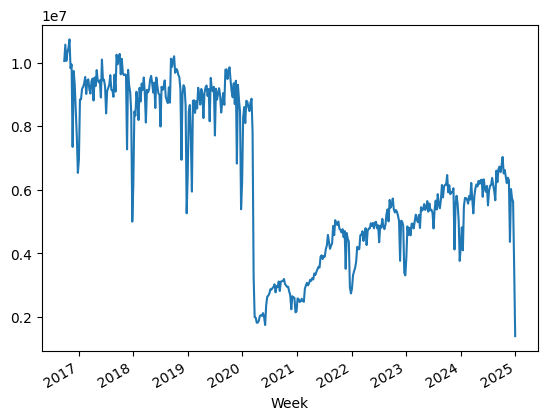

In [13]:
df['total_rides'].plot()

<Axes: xlabel='Week'>

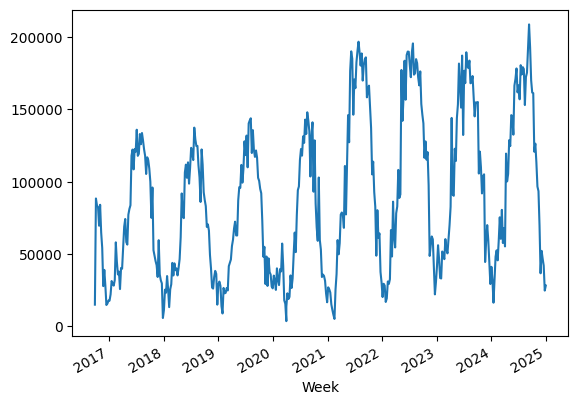

In [14]:
df['Total Counts'].plot()

In [15]:
df[["Total Counts", "total_rides"]].corr()

,Total Counts,total_rides
Total Counts,1.000000,-0.066907
total_rides,-0.066907,1.000000


    Varma is probably not the best model to use since there isn't a strong correlation between them.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Ensure "Week" is the DateTime index
df.index = pd.to_datetime(df.index)

# Select target variable (Divvy Total Counts)
target_variable = "Total Counts"

# Select exogenous variables (weather + CTA rides)
exogenous_variables = ["total_rides", "bus", "rail_boardings", "tavg", "tmin", "tmax", "prcp", "snow", "wspd"]

# Convert all columns to float for modeling
df = df.astype(float)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [17]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary (Needs Differencing)")

check_stationarity(df["Total Counts"])

ADF Statistic: -7.778994270085897
p-value: 8.516798938430497e-12
Stationary


In [18]:
# Define SARIMAX Model
model = SARIMAX(
    train[target_variable], 
    exog=train[exogenous_variables], 
    order=(1,0,1),  # (p,d,q)
    seasonal_order=(1,1,1,52)  # (P,D,Q,S) with 52 weeks (annual seasonality)
)

# Fit the model
model_fitted = model.fit(disp=False)

# Print model summary
print(model_fitted.summary())

/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       Total Counts   No. Observations:                  346
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood               -3154.395
Date:                            Thu, 06 Mar 2025   AIC                           6336.790
Time:                                    16:59:51   BIC                           6388.360
Sample:                                         0   HQIC                          6357.442
                                            - 346                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
total_rides       -0.0962      0.033     -2.872      0.004      -0.162      -0.031
bus                0.09

In [19]:
# Define SARIMAX Model
model = SARIMAX(
    train[target_variable], 
    exog=train[exogenous_variables], 
    order=(1,1,1),  # (p,d,q)
    seasonal_order=(1,1,1,52)  # (P,D,Q,S) with 52 weeks (annual seasonality)
)

# Fit the model
model_fitted = model.fit(disp=False)

# Print model summary
print(model_fitted.summary())

/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       Total Counts   No. Observations:                  346
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -3112.864
Date:                            Thu, 06 Mar 2025   AIC                           6253.728
Time:                                    17:00:03   BIC                           6305.251
Sample:                                         0   HQIC                          6274.364
                                            - 346                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
total_rides       -0.0571      0.010     -5.825      0.000      -0.076      -0.038
bus                0.06

In [20]:
# Forecast for the test set
forecast_steps = len(test)
forecast = model_fitted.forecast(steps=forecast_steps, exog=test[exogenous_variables])
forecast.index = test.index  # Force matching index

# Add predictions to test DataFrame
test["Predicted Total Counts"] = forecast

/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/j2/gbnqt5g13fbdlhczrh40l8780000gn/T/ipykernel_28309/2219395082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted Total Counts"] = forecast


In [21]:
forecast

Week
2023-05-08    144444.762717
2023-05-15    148509.802962
2023-05-22    157324.721370
2023-05-29    182243.497629
2023-06-05    171650.761595
                  ...      
2024-12-02     83500.442842
2024-12-09     79558.326158
2024-12-16     73890.445752
2024-12-23     61312.199850
2024-12-30     37277.490600
Name: predicted_mean, Length: 87, dtype: float64

In [22]:
test['Predicted Total Counts']

Week
2023-05-08    144444.762717
2023-05-15    148509.802962
2023-05-22    157324.721370
2023-05-29    182243.497629
2023-06-05    171650.761595
                  ...      
2024-12-02     83500.442842
2024-12-09     79558.326158
2024-12-16     73890.445752
2024-12-23     61312.199850
2024-12-30     37277.490600
Name: Predicted Total Counts, Length: 87, dtype: float64

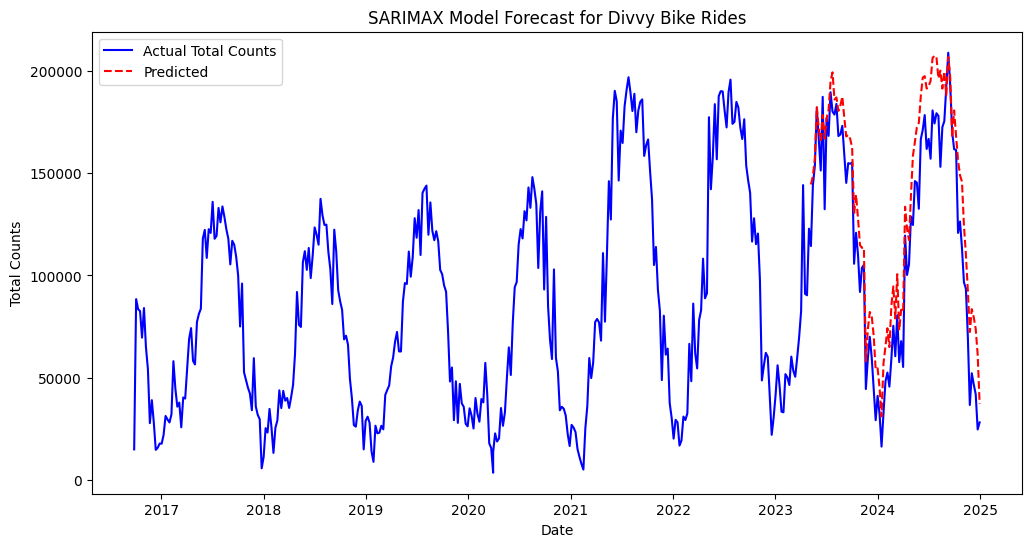

In [23]:
plt.figure(figsize=(12,6))

# Plot Actual vs Predicted for Divvy Rides
plt.plot(df.index, df[target_variable], label="Actual Total Counts", color="blue")
plt.plot(test.index, test["Predicted Total Counts"], label="Predicted", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Total Counts")
plt.title("SARIMAX Model Forecast for Divvy Bike Rides")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = test["Predicted Total Counts"]
y_test = test[target_variable]

# Compute MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute MAPE (avoid division by zero)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None))) * 100  # Avoid zero division

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 18976.15
MSE: 463563246.18
RMSE: 21530.52
MAPE: 24.34%


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

In [41]:
# Define exogenous variables
exog_vars = ["total_rides", "tavg", "prcp", "snow", "wspd"]

# Split exogenous variables into train/test
X_train, X_test = temporal_train_test_split(df[exog_vars], test_size=52)
y_train, y_test = temporal_train_test_split(df[target_variable], test_size=52)  # Last 52 weeks as test set
 
X_train = X_train.astype(float)
X_test = X_test.astype(float)

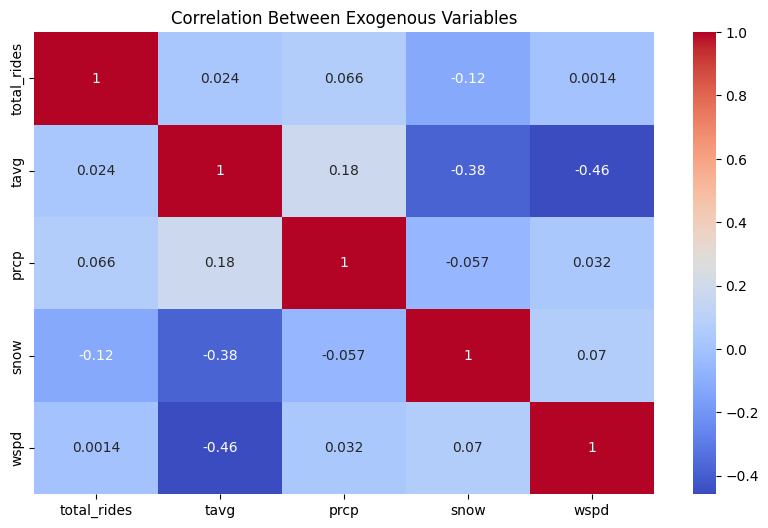

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Exogenous Variables")
plt.show()

In [48]:
from pmdarima import auto_arima
auto_arima(train[target_variable], exogenous=train[exogenous_variables], seasonal=True, m=52).summary()

/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  346
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -3832.924
Date:                Thu, 06 Mar 2025   AIC                           7681.848
Time:                        17:12:29   BIC                           7712.596
Sample:                             0   HQIC                          7694.093
                                - 346                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5677      0.079      7.187      0.000       0.413       0.723
ar.L2          1.0542      0.093     11.324      0.000       0.872       1.237
ar.L3         -0.4769      0.085     -5.602      0.000      -0.644      -0.310
ar.L4         -0.2442      0.060     -4.098      0.000      -0.361      -0.127
ma.L1         -0.8660      0.067    -13.017      0.000      -0.996      -0.736
ma.L2         -0.8328      0.077    -10.797      0.000      -0.984      -0.682
ma.L3          0.8463      0.060     14.001      0.000       0.728       0.965
sigma2      2.485e+08   2.82e-10   8.82e+17      0.000    2.49e+08    2.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               140.81
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.61
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.18e+33. Standard errors may be unstable.
"""